# Tests for warping functionality

In [1]:
%matplotlib inline

from importlib import reload
import geopandas as gpd
import rasterio
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt

import contextily as ctx
from contextily.tile import warp_img_transform, warp_tiles, _warper

db = gpd.read_file(gpd.datasets.get_path('nybb'))

* Pull a raster for the examples

In [2]:
! rm warp_tst.tif

db_wm = db.to_crs(epsg=3857)
w, s, e, n = db_wm.total_bounds
img, ext = ctx.bounds2raster(w, s, e, n, 
                             'warp_tst.tif', 
                             zoom=10)

! du -hs warp_tst.tif

1.2M	warp_tst.tif


* Test `warp_img_transform`

In [3]:
src = rasterio.open('warp_tst.tif')
img = src.read()
#rioshow(img, transform=src.transform);

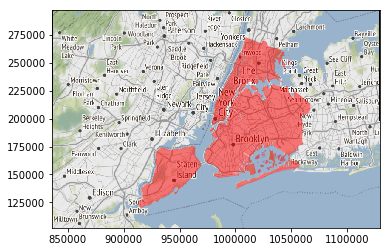

In [4]:
w_img, w_transform = warp_img_transform(img,
                                        src.transform,
                                        src.crs, db.crs)

f, ax = plt.subplots(1)
rioshow(w_img, 
        transform=w_transform, ax=ax);
db.plot(color='r', alpha=0.5, ax=ax)

* Test `warp_tiles`

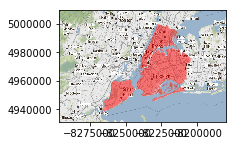

In [5]:
# All in Web Mercator
db_wm = db.to_crs(epsg=3857)
w, s, e, n = db_wm.total_bounds
img, ext = ctx.bounds2img(w, s, e, n, zoom=10)

f, ax = plt.subplots(1, figsize=(3, 3))
ax.imshow(img, extent=ext)
db_wm.plot(ax=ax, color='r', alpha=0.5)
plt.show()

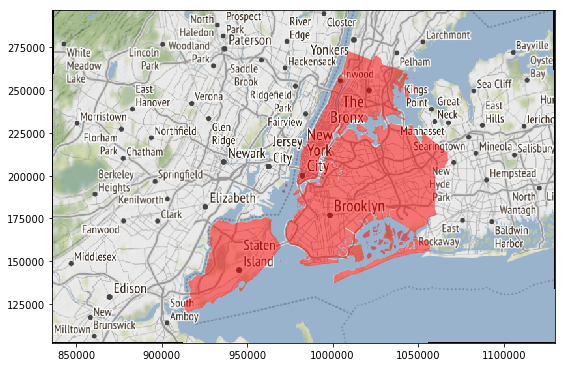

In [6]:
# Warp to original CRS
wimg, wext = ctx.tile.warp_tiles(img, ext, db.crs)

f, ax = plt.subplots(1, figsize=(9, 9))
ax.imshow(wimg, extent=wext)
db.plot(ax=ax, color='r', alpha=0.5)
plt.show()

* Test `warp_tiles` within `add_basemap`

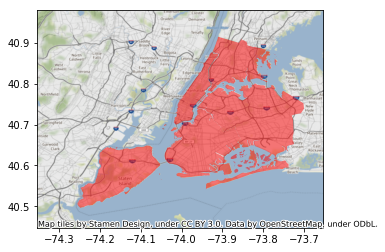

In [7]:
db_wm = db.to_crs(epsg=4326)
ax = db_wm.plot(color='red', alpha=0.5)
ctx.add_basemap(ax)

* Test warping within `add_basemap` and local file

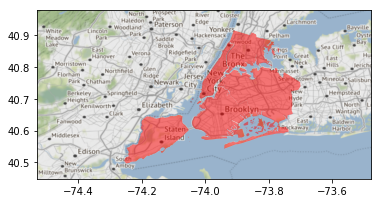

In [8]:
db_wm = db.to_crs(epsg=4326)
ax = db_wm.plot(color='red', alpha=0.5)
ctx.add_basemap(ax, 
                url='warp_tst.tif', 
                attribution=None)

---